## BANA8090 Fall 2019 Final Project

Name: Kamaleshwar Ravichandran<br>
Individual Project

### Project Description:

##### Analyzing Global Warming: 
Global air temperature level is affected by the quantity of greenhouse gases present in the atmosphere. By keeping air temperature as target variable and major greenhouse gases like carbon dioxide, nitrous oxide and methane as predictor variables, a linear regression model is built to predict the temperature increase in upcoming years.
##### Datasets used:
Global Air Temperature - Source: http://berkeleyearth.org/data/ <br>
Trends in CO2 level - Source: https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html  <br>
Atmospheric N2O concentration - Source: https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions <br>
Atmospheric CH4 concentration - Source: https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions 

### Data Wrangling:
Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Loading the Datasets

In [2]:
monthly_temp_anamoly=pd.read_csv('Air_Temperature.csv', names=['Year','Month','Anamoly'])
co2=pd.read_csv('co2.csv')
n2o=pd.read_csv('n20.csv')
ch4=pd.read_csv('ch4.csv')

Temperatures are given as anamolies i.e., as variation from set of monthly absolute temperatures during Jan 1951-Dec 1980

In [3]:
monthly_temp_anamoly.head()

,Year,Month,Anamoly
0,1850,1,-0.779
1,1850,2,-0.260
2,1850,3,-0.401
3,1850,4,-0.699
4,1850,5,-0.687


In [4]:
#Monthly absolute temperatures during Jan 1951-Dec 1980
abs_temp=[12.28,12.50,13.12,14.04,15.02,15.73,16.00,15.83,15.24,14.30,13.29,12.55]
abs_temp

[12.28,
 12.5,
 13.12,
 14.04,
 15.02,
 15.73,
 16.0,
 15.83,
 15.24,
 14.3,
 13.29,
 12.55]

Calculating the actual temperature by combining the anamolies and absolute temperature

In [5]:
j=0
for i in monthly_temp_anamoly.index:
        monthly_temp_anamoly.at[i,'Temperature']=monthly_temp_anamoly.at[i,'Anamoly']+abs_temp[j]
        j=j+1
        if j==11:
            j=0                               

Creating Date column by combing Year and Month

In [6]:
monthly_temp_anamoly['Date'] = pd.to_datetime(monthly_temp_anamoly[['Year', 'Month']].assign(Day=1))

In [7]:
monthly_temp_anamoly.head()

,Year,Month,Anamoly,Temperature,Date
0,1850,1,-0.779,11.501,1850-01-01
1,1850,2,-0.260,12.240,1850-02-01
2,1850,3,-0.401,12.719,1850-03-01
3,1850,4,-0.699,13.341,1850-04-01
4,1850,5,-0.687,14.333,1850-05-01


Filling the missing values of greenhouse gas concentrations using polynomial interpolation

In [8]:
co2=co2.replace(-99.99,np.nan)
co2.loc[co2['Co2 (ppm)'].isna()]

,Year,Month,Co2 (ppm)
49,1964,2,NaN
50,1964,3,NaN
51,1964,4,NaN
191,1975,12,NaN
291,1984,4,NaN


In [9]:
co2['Co2_interpolated']=co2['Co2 (ppm)'].interpolate(method='polynomial', order=2)
co2['Co2_interpolated']=round(co2['Co2_interpolated'],2)
co2.loc[co2['Co2 (ppm)'].isna()]

,Year,Month,Co2 (ppm),Co2_interpolated
49,1964,2,NaN,320.66
50,1964,3,NaN,321.53
51,1964,4,NaN,322.09
191,1975,12,NaN,330.47
291,1984,4,NaN,346.81


Grouping the datasets by year with mean of the seasonal variations during summer and winter in a year

In [10]:
avg_temp=monthly_temp_anamoly.groupby('Year',as_index=False).mean()
avg_temp=avg_temp.drop(['Month'],axis=1)
co2_temp=co2.groupby('Year',as_index=False).mean()
co2_temp=co2_temp.drop('Month',axis=1)

Joining all the greenhouse gas datasets

In [11]:
greenhouse_gas=pd.merge(co2_temp,n2o, on='Year', how='left')
greenhouse_gas=pd.merge(greenhouse_gas,ch4, on='Year', how='left')
greenhouse_gas.head(8)

,Year,Co2 (ppm),Co2_interpolated,Entity_x,Code_x,Nitrous Oxide,Entity_y,Code_y,Methane
0,1960,316.907500,316.907500,World,OWID_WRL,291.4,World,OWID_WRL,1262.97
1,1961,317.637500,317.637500,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,318.450833,318.450833,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,318.994167,318.994167,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,319.204444,319.760000,NaN,NaN,NaN,NaN,NaN,NaN
5,1965,320.044167,320.044167,World,OWID_WRL,292.9,World,OWID_WRL,1328.47
6,1966,321.383333,321.383333,NaN,NaN,NaN,NaN,NaN,NaN
7,1967,322.157500,322.157500,NaN,NaN,NaN,NaN,NaN,NaN


Filling the missing concentration of n2o and ch4 using polynomial interpolation

In [12]:
greenhouse_gas['n2o_interpolated']=greenhouse_gas['Nitrous Oxide'].interpolate(method='polynomial', order=2)
greenhouse_gas['n2o_interpolated']=round(greenhouse_gas['n2o_interpolated'],2)
greenhouse_gas['n2o_interpolated'].isna().sum()

0

In [13]:
greenhouse_gas['ch4_interpolated']=greenhouse_gas['Methane'].interpolate(method='polynomial', order=2)
greenhouse_gas['ch4_interpolated']=round(greenhouse_gas['ch4_interpolated'],2)
greenhouse_gas['ch4_interpolated'].isna().sum()

0

In [14]:
greenhouse_gas[['Year','Co2_interpolated','n2o_interpolated','ch4_interpolated']].head()

,Year,Co2_interpolated,n2o_interpolated,ch4_interpolated
0,1960,316.907500,291.40,1262.97
1,1961,317.637500,291.67,1275.29
2,1962,318.450833,291.95,1288.01
3,1963,318.994167,292.25,1301.11
4,1964,319.760000,292.57,1314.59


Merging temperature data with greenhouse gases dataset

In [15]:
Main_table=pd.merge(greenhouse_gas,avg_temp,on='Year', how='left')
Main_table[['Year','Co2_interpolated','n2o_interpolated','ch4_interpolated','Temperature']].head()

,Year,Co2_interpolated,n2o_interpolated,ch4_interpolated,Temperature
0,1960,316.907500,291.40,1262.97,14.145417
1,1961,317.637500,291.67,1275.29,14.248333
2,1962,318.450833,291.95,1288.01,14.250250
3,1963,318.994167,292.25,1301.11,14.367750
4,1964,319.760000,292.57,1314.59,14.178667


### Visualitization:

From below plot the seasonal variation during winter and summer each year can be seen

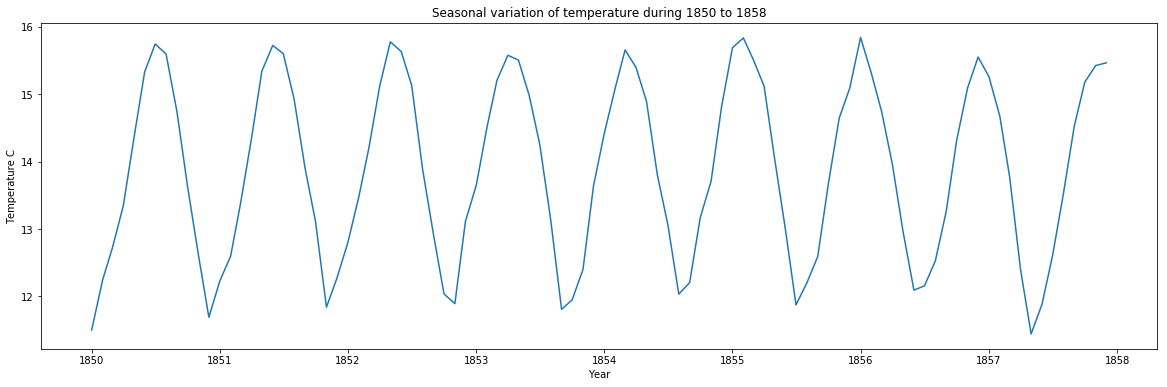

In [16]:
plt.figure(figsize=(20,6))
plt.plot(monthly_temp_anamoly['Date'].head(96),monthly_temp_anamoly['Temperature'].head(96));
plt.xlabel('Year');
plt.ylabel('Temperature C');
plt.title('Seasonal variation of temperature during 1850 to 1858');

From below plot it can be seen that there is a gradual increase in the global temperature during the years 1850 to 2019.<br>
Since winter temperature is still not available for 2019, a high rise is seen.

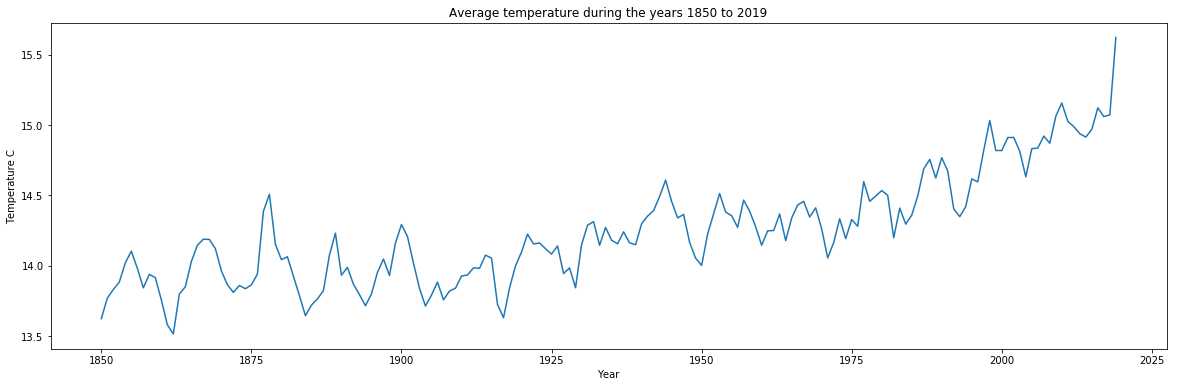

In [17]:
plt.figure(figsize=(20,6))
plt.plot(avg_temp['Year'],avg_temp['Temperature']);
plt.xlabel('Year');
plt.ylabel('Temperature C');
plt.title('Average temperature during the years 1850 to 2019');

Overlaying the seasonal variation plot with the average temperature plot

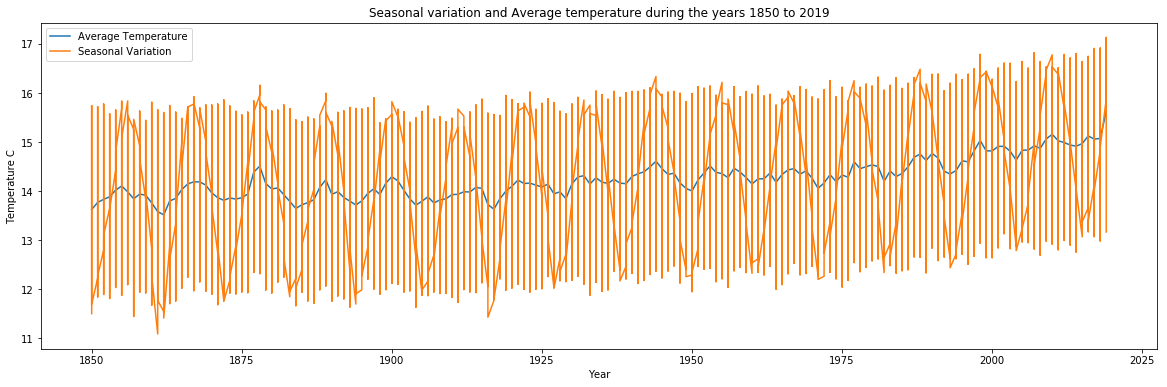

In [18]:
plt.figure(figsize=(20,6))
plt.plot(avg_temp['Year'],avg_temp['Temperature']);
plt.plot(monthly_temp_anamoly['Year'],monthly_temp_anamoly['Temperature']);
#plt.plot([1850,2020], [14,14], 'Red', lw=2);
plt.xlabel('Year');
plt.ylabel('Temperature C');
plt.title('Seasonal variation and Average temperature during the years 1850 to 2019');
plt.legend(labels=['Average Temperature','Seasonal Variation']);

From the below stacked area chart, concentration level between the 3 gases can be seen

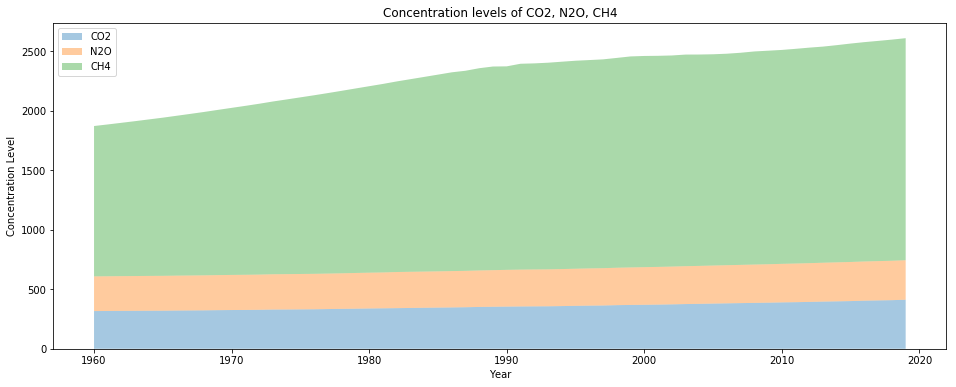

In [19]:
plt.figure(figsize=(16,6))
plt.stackplot(greenhouse_gas['Year'],greenhouse_gas['Co2_interpolated'],greenhouse_gas['n2o_interpolated'],greenhouse_gas['ch4_interpolated'],
             labels=['CO2','N2O','CH4'], alpha=0.4 );
plt.legend(loc='upper left');
plt.xlabel('Year');
plt.ylabel('Concentration Level');
plt.title('Concentration levels of CO2, N2O, CH4');

From the below individual plots, trend of increase in level of gases over the years can be seen

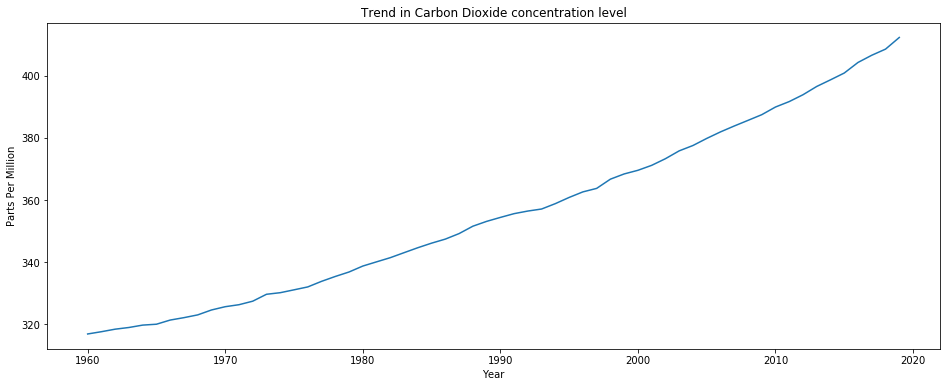

In [20]:
plt.figure(figsize=(16,6))
plt.plot(greenhouse_gas['Year'],greenhouse_gas['Co2_interpolated']);
plt.xlabel('Year');
plt.ylabel('Parts Per Million');
plt.title('Trend in Carbon Dioxide concentration level');

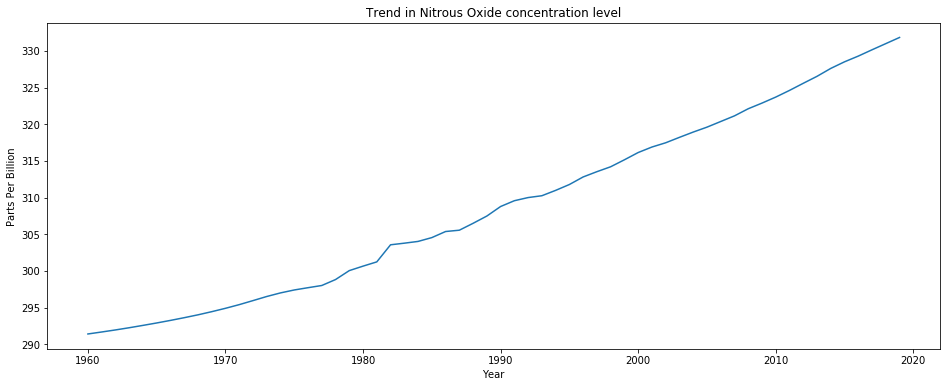

In [21]:
plt.figure(figsize=(16,6))
plt.plot(greenhouse_gas['Year'],greenhouse_gas['n2o_interpolated']);
plt.xlabel('Year');
plt.ylabel('Parts Per Billion');
plt.title('Trend in Nitrous Oxide concentration level');

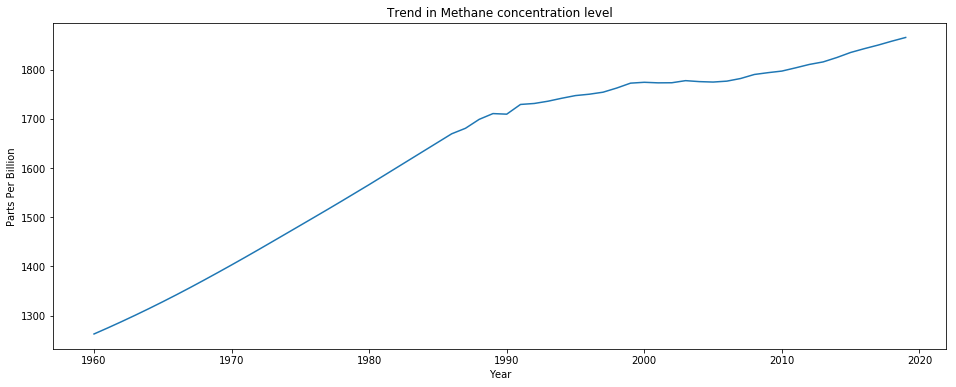

In [22]:
plt.figure(figsize=(16,6))
plt.plot(greenhouse_gas['Year'],greenhouse_gas['ch4_interpolated']);
plt.xlabel('Year');
plt.ylabel('Parts Per Billion');
plt.title('Trend in Methane concentration level');

Correlation between the greenhouse gases and global temperature

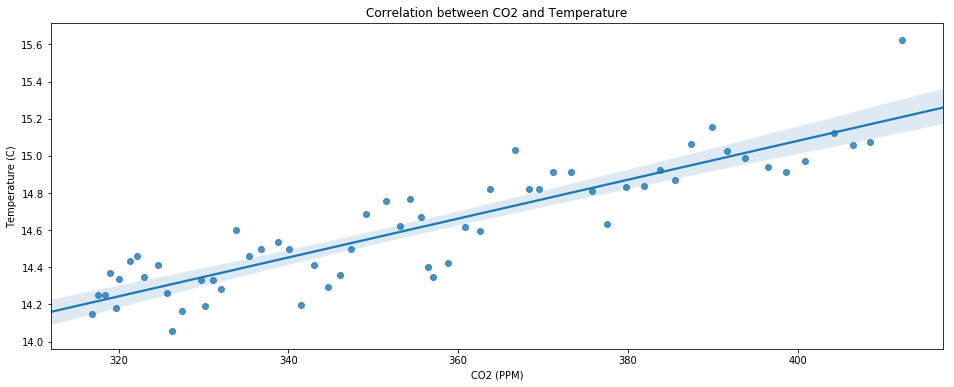

In [23]:
plt.figure(figsize=(16,6))
sns.regplot('Co2_interpolated','Temperature',data=Main_table);
plt.xlabel('CO2 (PPM)');
plt.ylabel('Temperature (C)');
plt.title('Correlation between CO2 and Temperature');

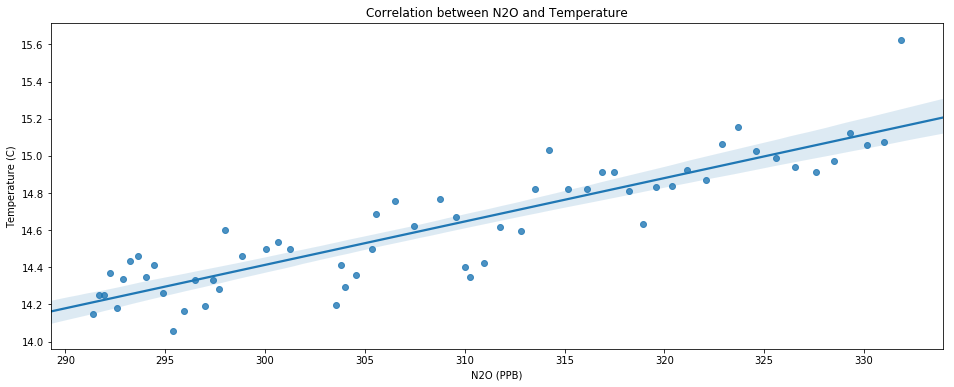

In [24]:
plt.figure(figsize=(16,6))
sns.regplot('n2o_interpolated','Temperature',data=Main_table);
plt.xlabel('N2O (PPB)');
plt.ylabel('Temperature (C)');
plt.title('Correlation between N2O and Temperature');

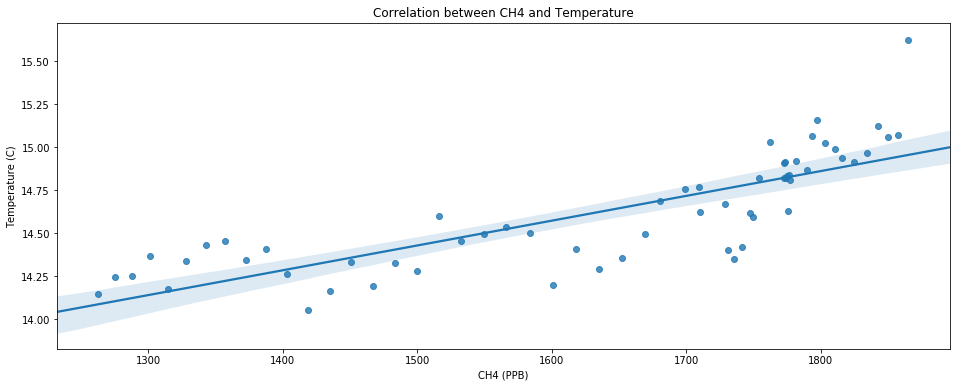

In [25]:
plt.figure(figsize=(16,6))
sns.regplot('ch4_interpolated','Temperature',data=Main_table);
plt.xlabel('CH4 (PPB)');
plt.ylabel('Temperature (C)');
plt.title('Correlation between CH4 and Temperature');

### Modelling:
Splitting the Dataset into Test and Train data

In [26]:
feature_cols=['Co2_interpolated','n2o_interpolated','ch4_interpolated']
target_col='Temperature'
X=Main_table[feature_cols]
y=Main_table[target_col]

In [27]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=24)

Building the Linear Regression Model

In [28]:
model=LinearRegression(fit_intercept=True)
model.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
model.score(Xtest,ytest)

0.8360236649741055

Thus, the model can predict the global temperature with 83.60% accuracy from greenhouse gases concentrations. <br>
In the below cell, passing random concentration values, to see the predicted global temperature.

In [30]:
new_set={'Co2_interpolated':400.134455,'n2o_interpolated':320.34,'ch4_interpolated':3401.33}
new_df=pd.DataFrame([new_set])
new_df=new_df[['Co2_interpolated','n2o_interpolated','ch4_interpolated']]
model.predict(new_df)

array([15.42109853])

### Predicting future values:

Calculating the percentage change in concentrations levels of greenhouse gases year by year: <br>
From the median of concentration in the past 20 years, it can be seen <br>
CO2 increases at the rate of 0.55% per year, <br>
N2O increases at the rate of 0.25% per year, <br>
CH4 increases at the rate of 0.29% per year

0.005507250056703494

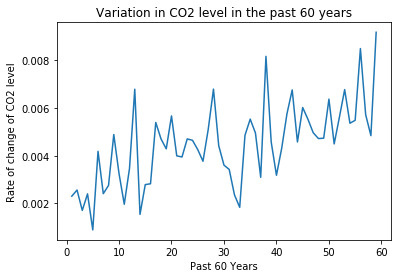

In [31]:
Co2_change=Main_table['Co2_interpolated'].pct_change()
plt.plot(Co2_change);
plt.xlabel('Past 60 Years');
plt.ylabel('Rate of change of CO2 level');
plt.title('Variation in CO2 level in the past 60 years');
Co2_change[40:60].median()

0.002538742116743653

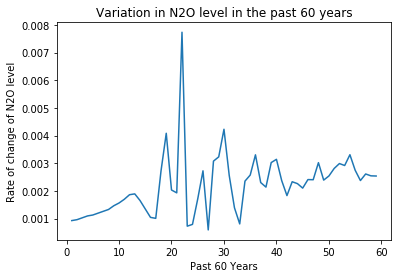

In [32]:
n2o_change=Main_table['n2o_interpolated'].pct_change()
plt.plot(n2o_change);
plt.xlabel('Past 60 Years');
plt.ylabel('Rate of change of N2O level');
plt.title('Variation in N2O level in the past 60 years');
n2o_change[40:60].median()

0.0029171994301865345

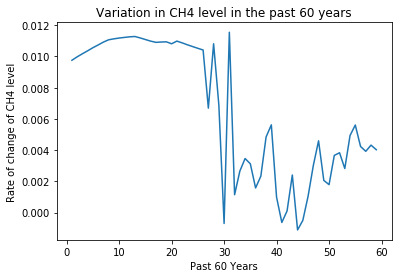

In [33]:
ch4_change=Main_table['ch4_interpolated'].pct_change()
plt.plot(ch4_change);
plt.xlabel('Past 60 Years');
plt.ylabel('Rate of change of CH4 level');
plt.title('Variation in CH4 level in the past 60 years');
ch4_change[40:60].median()

Using the trend in variation of concentration levels, future values of the gases are calculated.

In [34]:
co2_predict=[0]*10
n2o_predict=[0]*10
ch4_predict=[0]*10
co2_predict[0]=round(Main_table['Co2_interpolated'].loc[59],6)
n2o_predict[0]=round(Main_table['n2o_interpolated'].loc[59],6)
ch4_predict[0]=round(Main_table['ch4_interpolated'].loc[59],6)
for i in range(1,10):
    co2_predict[i]=round((co2_predict[i-1]*Co2_change[50+i])+co2_predict[i-1],6)
    n2o_predict[i]=round((n2o_predict[i-1]*n2o_change[50+i])+n2o_predict[i-1],6)
    ch4_predict[i]=round((ch4_predict[i-1]*ch4_change[50+i])+ch4_predict[i-1],6)

Creating a Test Dataset from the calculated future concentration levels

In [35]:
predict_df=pd.DataFrame({'co2_predict':co2_predict,'n2o_predict':n2o_predict,'ch4_predict':ch4_predict},
                         columns=['co2_predict','n2o_predict','ch4_predict'])
predict_df

,co2_predict,n2o_predict,ch4_predict
0,412.271250,331.830000,1865.100000
1,414.125188,332.762855,1871.929967
2,416.452303,333.757217,1879.102470
3,419.272862,334.731077,1884.406593
4,421.521555,335.838202,1893.706974
5,423.833691,336.760806,1904.325601
6,427.434067,337.560396,1912.390775
7,429.881019,338.441996,1919.895435
8,431.962294,339.303093,1928.188966
9,435.927025,340.164190,1935.953123


Predicting the Global temperature levels for this calculated level of concentrations

In [36]:
predict_df['predicted_temperature']=model.predict(predict_df)

In [37]:
predict_df['Year']=range(2019,2029)
predict_df

,co2_predict,n2o_predict,ch4_predict,predicted_temperature,Year
0,412.271250,331.830000,1865.100000,15.246649,2019
1,414.125188,332.762855,1871.929967,15.260516,2020
2,416.452303,333.757217,1879.102470,15.285337,2021
3,419.272862,334.731077,1884.406593,15.325098,2022
4,421.521555,335.838202,1893.706974,15.342970,2023
5,423.833691,336.760806,1904.325601,15.370472,2024
6,427.434067,337.560396,1912.390775,15.439967,2025
7,429.881019,338.441996,1919.895435,15.472982,2026
8,431.962294,339.303093,1928.188966,15.496416,2027
9,435.927025,340.164190,1935.953123,15.573735,2028


In [38]:
(predict_df['predicted_temperature'].loc[9]-predict_df['predicted_temperature'].loc[0])/predict_df['predicted_temperature'].loc[0]

0.021452987147197226

From the predicted values, it can be seen that global temperature will increase by 2.14% in 2028

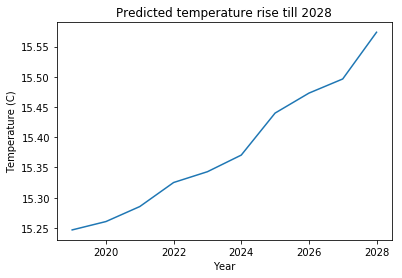

In [39]:
plt.plot(predict_df['Year'],predict_df['predicted_temperature']);
plt.xlabel('Year');
plt.ylabel('Temperature (C)');
plt.title('Predicted temperature rise till 2028');

### Conclusion:
From the visualizations it can be seen that with increase in level of greenhouse gases there is a gradual increase in global temperature. Thus, if the concentration of these gases are keep on increasing at the same rate, then the global temperature will rise by 2.24% in 2028.